## Análise de dados do consumo de cerveja em São Paulo

Importando as bibliotecas de data science 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



Carregando a base de dados

In [2]:
#coleta
df = pd.read_csv("datasets_28454_184859_Consumo_cerveja.csv")
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


## *Descrição das variáveis*
* data: a data com dia, mês e ano

* temperatura_media(c): temperatura media em grau celsius

* temperatura_minima(c): temperatura minuma em grau celsius

* temperatura_maxima(c): temperatura maxima em grau celsius

* precipitacao(mm): fenômeno relacionado á queda de água do céu

* final_de_semana: 1 " Verdadeiro " é fim de semana e 0 " Falso " é dia de semana comun

* cosumo_de_cerveja(litros): quantidade de cerveja consumida em litros

## Análise

Quais as dimensões do dataframe?

Quantas linhas (variáveis) e quantas colunas (entradas) ele apresenta?

In [4]:
print("Dimensões do dataframe: ")
print("Linha: {}".format(df.shape[0]))
print("Colunas: {}".format(df.shape[1])) 

Dimensões do dataframe: 
Linha: 941
Colunas: 7


Quais os tipos de dados e suas variáveis presentes?

In [5]:
# qual o tipo de dado em cada coluna
df.dtypes 

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

In [6]:
# retorna todas as colunas do dados
df.columns.values

array(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'], dtype=object)

In [7]:
# tipos de valores
df.dtypes.value_counts()

object     5
float64    2
dtype: int64

In [8]:
# dados nao numericos
df.isna().any()

Data                           True
Temperatura Media (C)          True
Temperatura Minima (C)         True
Temperatura Maxima (C)         True
Precipitacao (mm)              True
Final de Semana                True
Consumo de cerveja (litros)    True
dtype: bool

Possui valores ausentes?

In [9]:
#detectar numeros faltantes em cada coluna
df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

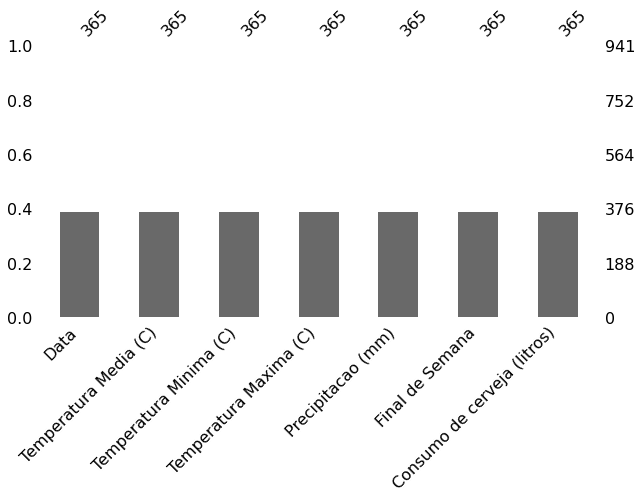

In [10]:
#valores faltantes representados
msno.bar (df, figsize = (10,5)); 

In [11]:
#valores distintos por ordem decrescentes
df.nunique().sort_values(ascending=False) 

Data                           365
Consumo de cerveja (litros)    359
Temperatura Media (C)          277
Temperatura Maxima (C)         151
Temperatura Minima (C)         110
Precipitacao (mm)               93
Final de Semana                  2
dtype: int64

### Tratamento dos Dados

In [12]:
# Remoção dps valores ausentes
df.dropna(subset=['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'], how="all", inplace=True )

# Valor Datatime na coluna Data
df["Data"] = pd.to_datetime(df["Data"], format="%Y-%m-%d")

# Transformando temperaturas de str para float
df["Temperatura Media (C)"] = df["Temperatura Media (C)"].str.replace(",", ".").astype(float)
df["Temperatura Minima (C)"] = df["Temperatura Minima (C)"].str.replace(",", ".").astype(float)
df["Temperatura Maxima (C)"] = df["Temperatura Maxima (C)"].str.replace(",", ".").astype(float)
df["Precipitacao (mm)"] = df["Precipitacao (mm)"].str.replace(",", ".").astype(float)

# Transforamndo fim de semana de float para int
df["Final de Semana"] = df["Final de Semana"].astype(int)



### DataSet limpa
Tabela com os dados alterados

In [13]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


In [14]:
#detectar numeros faltantes em cada coluna [atualizada]
df.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [15]:
# qual o tipo de dado em cada coluna [atualizada]
df.dtypes

Data                           datetime64[ns]
Temperatura Media (C)                 float64
Temperatura Minima (C)                float64
Temperatura Maxima (C)                float64
Precipitacao (mm)                     float64
Final de Semana                         int64
Consumo de cerveja (litros)           float64
dtype: object

In [16]:
# tipos de valores [atualizada]
df.dtypes.value_counts()

float64           5
datetime64[ns]    1
int64             1
dtype: int64

Análise visual através de um gráfico de frenquências.

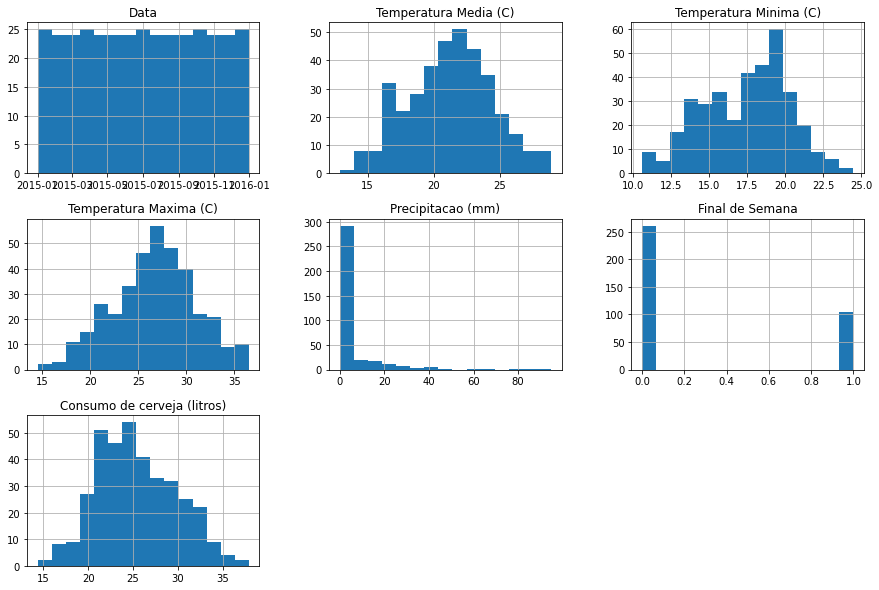

In [17]:
df.hist(bins=15, figsize=(15,10));

Método que permite verificar múltiplas parametros estatísticas dos dados

In [18]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


Exemplificando visualmente a correlação através de um heatmap

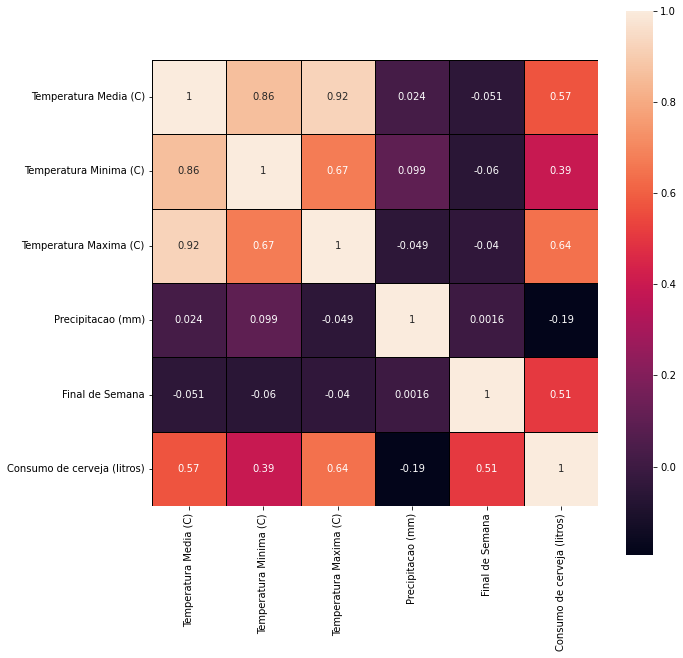

In [19]:
plt.figure(figsize=(10, 10));
sns.heatmap(df.corr(), square=True, annot=True, linewidths=1, linecolor="k");

#### Encontrar correlação entre colunas 
Observação : 

* Temperatura Media (C) não tem correlação com Final de semana
* Precipitação não tem correlação com o consumo de cerveja (litros)
* Temperatura Media (C) tem uma aula correlaçaão com Temperatura Maxima (C) e Temperatura Minima (C)
* Temperaturas Maxima (C) tem correlação com o Consumode cerveja (litros)

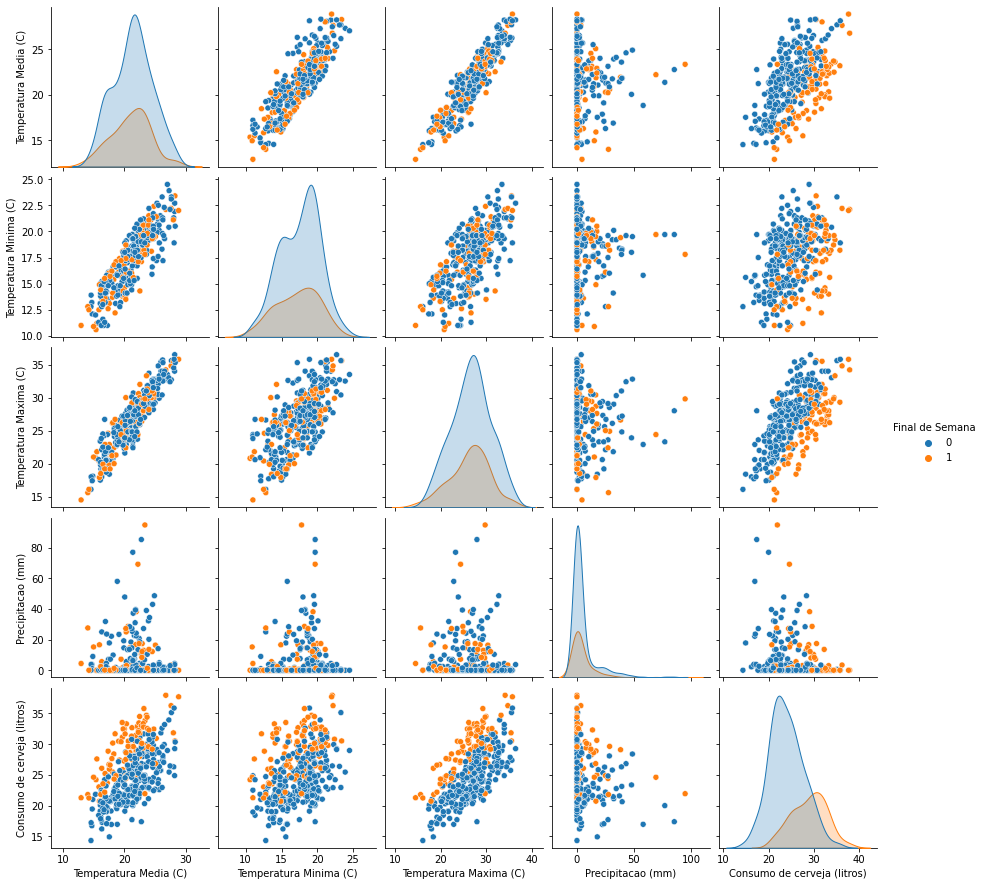

In [20]:
sns.pairplot(df, hue="Final de Semana")

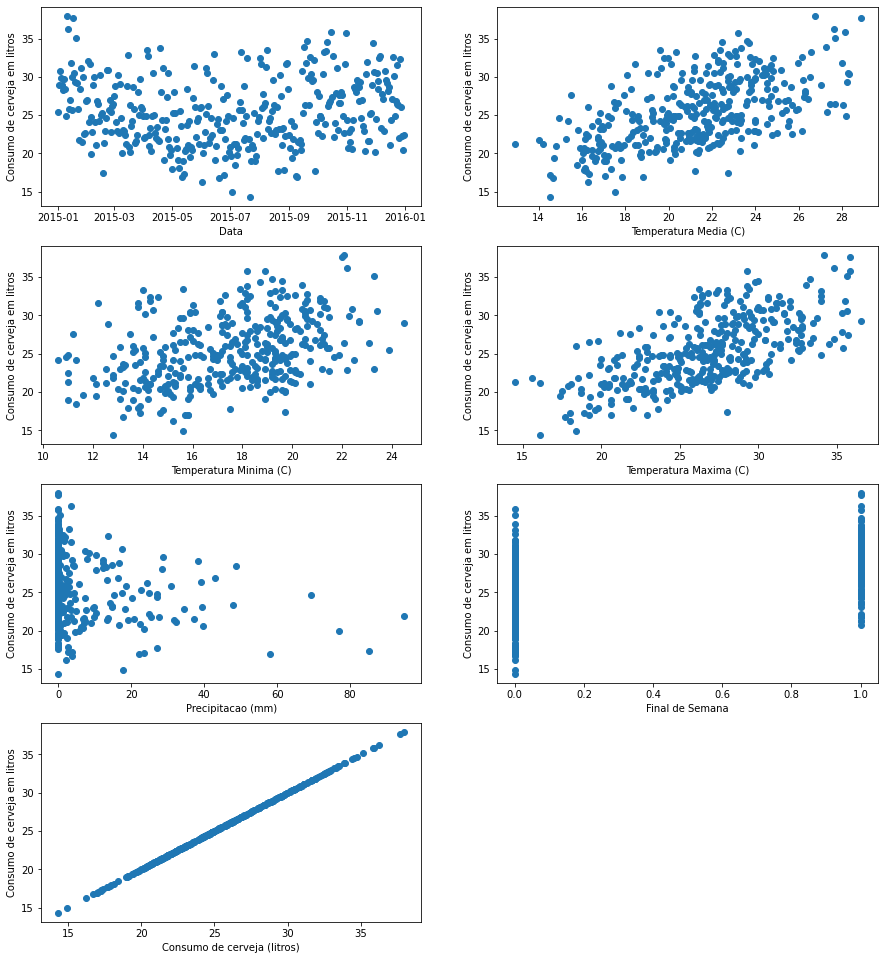

In [21]:
X = df
y = df["Consumo de cerveja (litros)"]

plt.figure(figsize=(15, 30))
for i, col in enumerate(X.columns):
  plt.subplot(7, 2, i+1)
  x = X[col]
  y = y
  plt.plot(x, y, 'o')

  plt.xlabel(col)
  plt.ylabel("Consumo de cerveja em litros")

### Consumo de cerveja em dias normais e fins de semana

In [22]:
# plt.figure(figsize=(12, 3));
# sns.boxplot(df["Consumo de cerveja (litros)"]);
# plt.xlabel("Consumo de cerveja em litros");
# plt.xlim(10,40);

O consumo de cerveja em litros é mais elevado aos fins de semana ou em dias normais da semana?
* 0 - Dia de semana
* 1 - Final de semana

In [23]:
 # tipo de dia(dia de semana, fim de semana)
df["Final de Semana"].value_counts()

0    261
1    104
Name: Final de Semana, dtype: int64

/Users/joaovitordinizcosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joaovitordinizcosta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


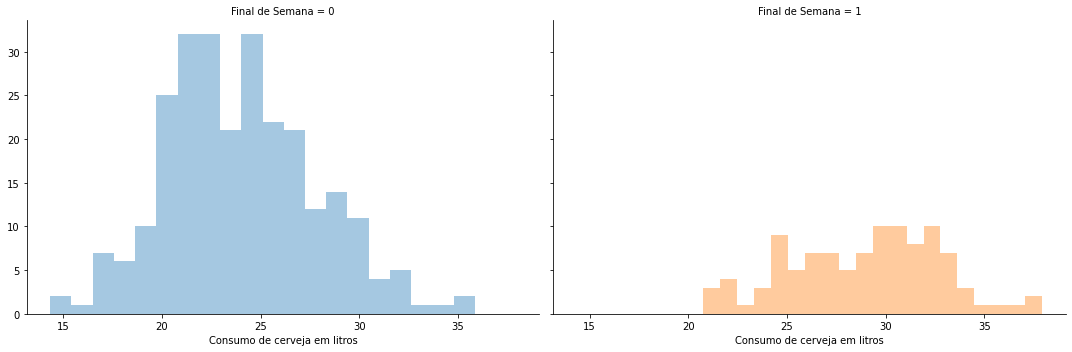

In [24]:
#bugado
g = sns.FacetGrid(df, col="Final de Semana", hue="Final de Semana", height=5, aspect=1.5)

g.map(sns.distplot, "Consumo de cerveja (litros)", kde=False, bins=20);

g.set_xlabels("Consumo de cerveja em litros");



In [25]:
dcc = df.groupby(["Final de Semana"]).agg({"Consumo de cerveja (litros)" :["count", "sum",
                                            "mean", "std","min", "median","max"]}).round(3)
dcc

Consumo de cerveja (litros)                                   \
                                      count       sum    mean    std     min   
Final de Semana                                                                
0                                       261  6263.536  23.998  3.788  14.343   
1                                       104  3007.963  28.923  3.830  20.738   

                                 
                 median     max  
Final de Semana                  
0                23.614  35.861  
1                29.482  37.937

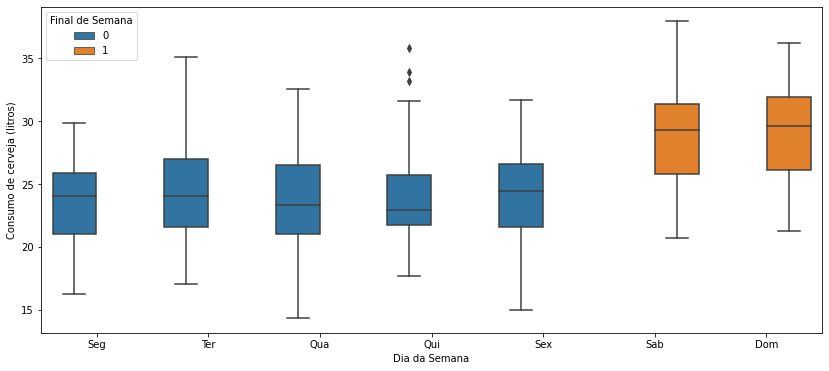

In [26]:
# Buscando o dia da smena equivalante ao dia 
df["Dia da Semana"] = df["Data"].dt.dayofweek

# Boxplot do consumo por dia da semana 
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(y="Consumo de cerveja (litros)", x="Dia da Semana",hue="Final de Semana", data=df)
ax.set_xticklabels( ("Seg", "Ter", "Qua", "Qui", "Sex", "Sab", "Dom") );

O consumo de cerveja é maior nos finais de semana do que no resto da semana. No entanto, os finais de semana correspondem a 104 dias de um total de 365 dias do ano.

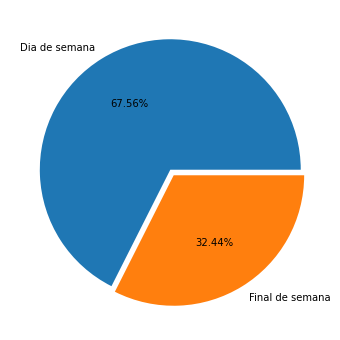

In [27]:
plt.figure(figsize=(6,6))

plt.pie(dcc["Consumo de cerveja (litros)"]["sum"],
        labels=["Dia de semana", "Final de semana"],
        autopct="%.2f%%",
        explode=[0,0.05]);

O dia da semana 0 teve o menor consumo médio de álcool, mas representou 67,56% das vendas anuais de cerveja

### Consumo de cerveja por temperatura

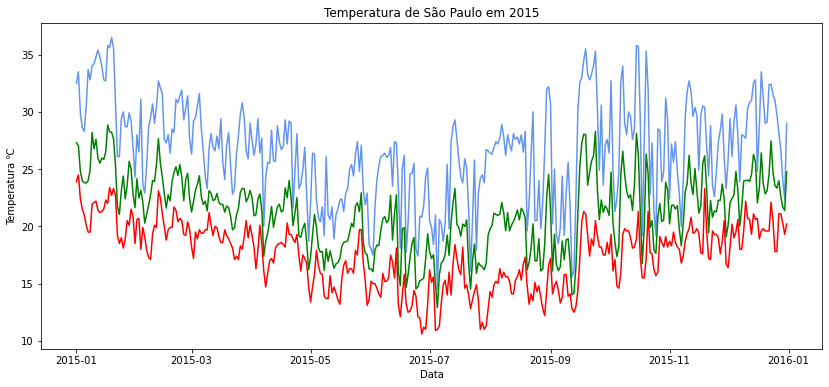

In [28]:
# Grafico de correlação entre temperatura e consumo

temp = df.copy()
temp["media_movel"] = temp.iloc[:, -1].rolling(window=15).mean()
temp["media_movel_temperatura"] = temp.iloc[:, 1].rolling(window=15).mean()

fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data = temp, y="Temperatura Maxima (C)", x="Data", color = "cornflowerblue")
sns.lineplot(data = temp, y="Temperatura Media (C)", x="Data", color = "green")
sns.lineplot(data = temp, y="Temperatura Minima (C)", x="Data", color = "red")

ax.set(xlabel="Data", ylabel="Temperatura ℃", title="Temperatura de São Paulo em 2015");

* Temperatura Maxima em Celsius

Text(27.030468750000004, 0.5, 'Consumo de cerveja em litros')

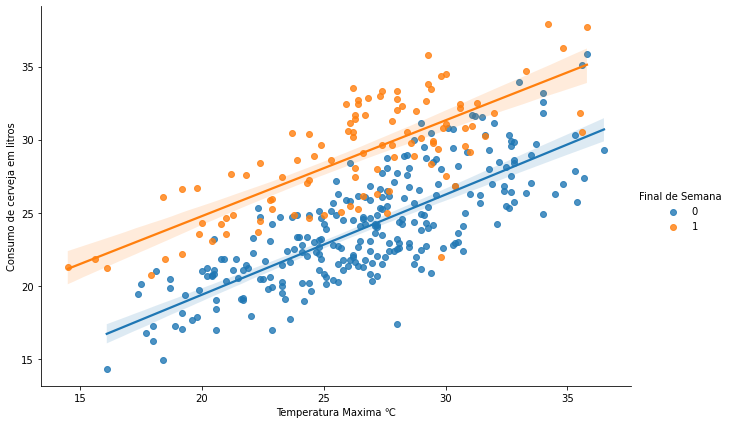

In [29]:
sns.lmplot(x="Temperatura Maxima (C)", y="Consumo de cerveja (litros)", hue="Final de Semana", data=df, aspect=1.5, height=6);

plt.xlabel("Temperatura Maxima ℃")
plt.ylabel("Consumo de cerveja em litros")

* Temperatura Media em Celsius

Text(27.030468750000004, 0.5, 'Consumo de cerveja em litros')

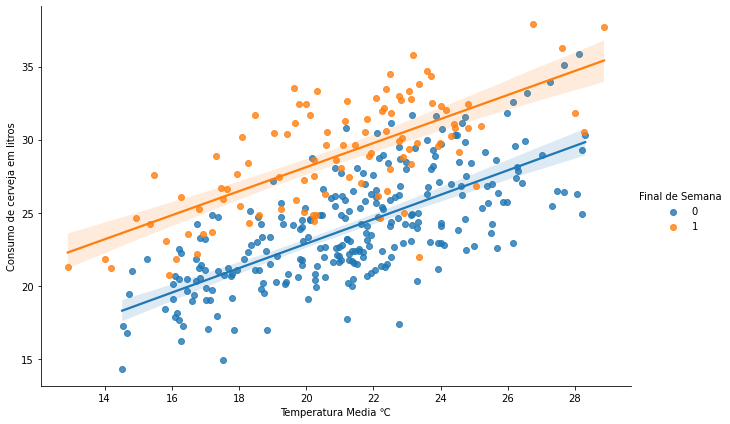

In [30]:
sns.lmplot(x="Temperatura Media (C)", y="Consumo de cerveja (litros)", hue="Final de Semana", data=df, aspect=1.5, height=6);

plt.xlabel("Temperatura Media ℃")
plt.ylabel("Consumo de cerveja em litros")

* Temperatura Minima em Celsius

Text(27.030468750000004, 0.5, 'Consumo de cerveja em litros')

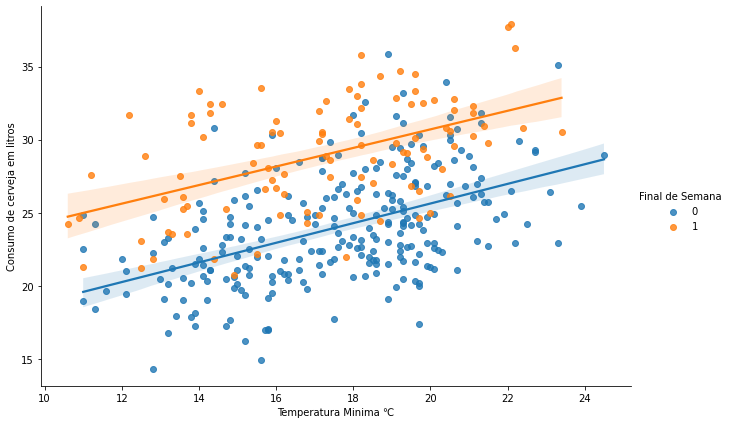

In [31]:
sns.lmplot(x="Temperatura Minima (C)", y="Consumo de cerveja (litros)", hue="Final de Semana", data=df, aspect=1.5, height=6);

plt.xlabel("Temperatura Minima ℃")
plt.ylabel("Consumo de cerveja em litros")

* Precipitação

Text(27.030468750000004, 0.5, 'Consumo de cerveja em litros')

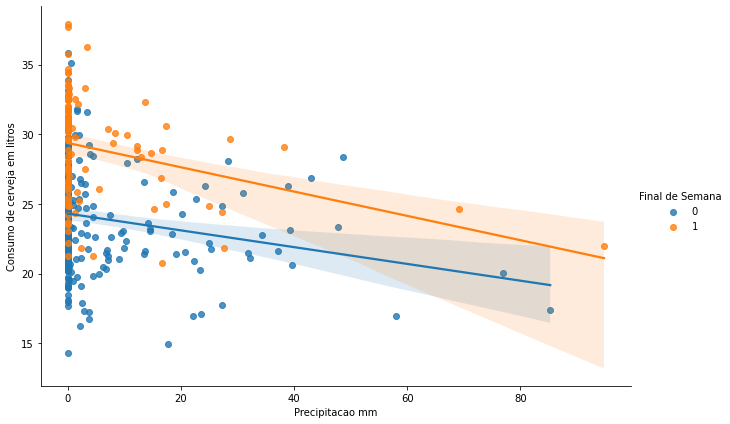

In [32]:
sns.lmplot(x="Precipitacao (mm)", y="Consumo de cerveja (litros)", hue="Final de Semana", data=df, aspect=1.5, height=6);

plt.xlabel("Precipitacao mm")
plt.ylabel("Consumo de cerveja em litros")

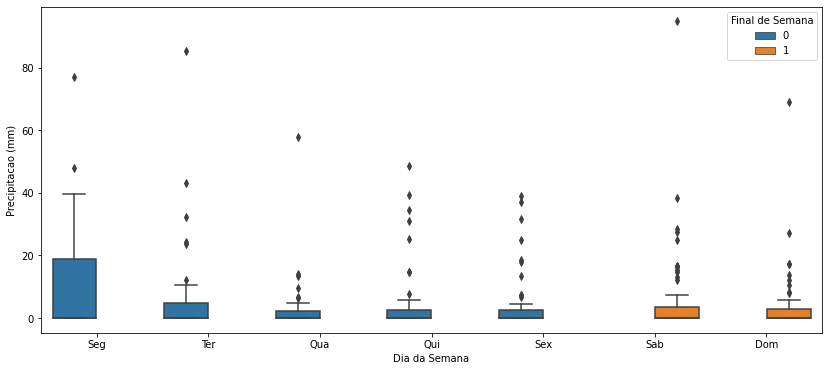

In [33]:
# Boxplot do consumo por por pricipitacao
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(y="Precipitacao (mm)", x="Dia da Semana",hue="Final de Semana", data=df)
ax.set_xticklabels( ("Seg", "Ter", "Qua", "Qui", "Sex", "Sab", "Dom") );

### Modelo
Dividir o conjunto de dados de treino e teste.

In [34]:
X = df.drop(["Data", "Temperatura Maxima (C)", "Consumo de cerveja (litros)"], axis=1)
y = df["Consumo de cerveja (litros)"].values

In [35]:
X.head()

,Temperatura Media (C),Temperatura Minima (C),Precipitacao (mm),Final de Semana,Dia da Semana
0,27.30,23.9,0.0,0,3
1,27.02,24.5,0.0,0,4
2,24.82,22.4,0.0,1,5
3,23.98,21.5,1.2,1,6
4,23.82,21.0,0.0,0,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [37]:

def info(yTest_, pred_, sg= "X"): 
    "Return resultados"

    print(f'''
    {sg}

    {'-' * 65}

    Mean squared error | {mean_absolute_error(yTest_,pred_)}
    r2 Score           | {r2_score(yTest_,pred_)}
    
    {'-' * 65}
    ''') 



In [38]:

def graficos(y, pred):

    plt.figure(figsize=(12, 6))

    plt.plot(y, y)
    plt.scatter(pred, y, c="r", marker="o")
    plt.legend(["Real", "Previsão"])
    plt.grid(ls='-.', lw=0.2, c='k')
    

    plt.figure(figsize=(12, 6))
    sns.histplot(y, kde=True, color="red")
    sns.histplot(pred, kde=True, color="blue")
    plt.legend(["Real", "Previsão"])
    plt.grid(ls='-.', lw=0.2, c='k')


In [39]:
lR = LinearRegression()

In [40]:
lR.fit(X_train, y_train)

LinearRegression()

In [41]:
pred_lR = lR.predict(X_test)

Resultado

In [42]:
info(y_test, pred_lR, "Regressão Linear")


    Regressão Linear

    -----------------------------------------------------------------

    Mean squared error | 2.1989710449461484
    r2 Score           | 0.6913490486690663
    
    -----------------------------------------------------------------
    


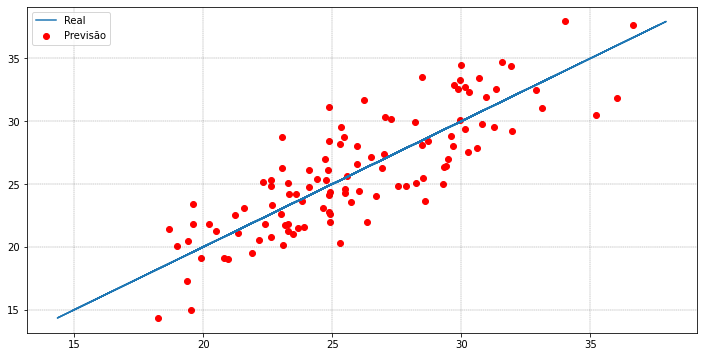

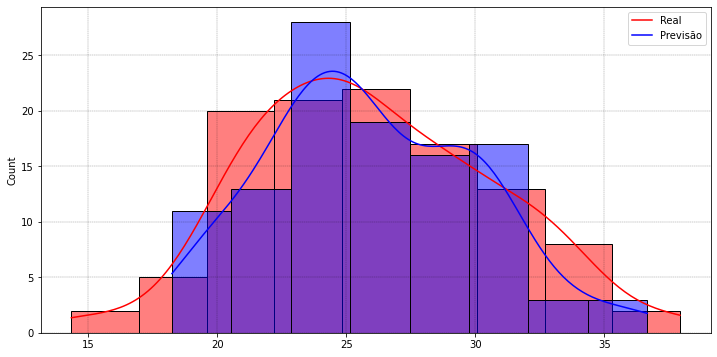

In [43]:
graficos(y_test, pred_lR)